## 일조량, 발전량 Scatter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 발전량 데이터

In [24]:
gen = pd.read_csv('./data/generation.csv', encoding='euc-kr', names=['일시', '시간', '발전량'])

#### 일시와 시간을 datetime형으로 변경

In [25]:
gen['일시'] = pd.to_datetime(gen['일시']) + pd.to_timedelta(gen['시간'], unit='h')
gen = gen.drop(['시간'], axis=1)

#### 발전량 결측치를 0으로 전환

In [4]:
gen['발전량'] = gen['발전량'].replace(' - ', '0').astype('float32')

In [26]:
gen.head()

,일시,발전량
0,2017-07-01 01:00:00,-
1,2017-07-01 02:00:00,-
2,2017-07-01 03:00:00,-
3,2017-07-01 04:00:00,-
4,2017-07-01 05:00:00,-


### 일조량 데이터

In [27]:
weather = pd.read_csv('./weather.csv', encoding='euc-kr')

In [28]:
weather[(weather['일조(hr)'].notnull()) & (weather['일사(MJ/m2)'].isnull())]

,지점,일시,일조(hr),일조 QC플래그,일사(MJ/m2)
4398,170,2017-07-01 06:00,0.0,0,NaN
4399,170,2017-07-01 07:00,0.0,0,NaN
4400,170,2017-07-01 08:00,0.0,0,NaN
4401,170,2017-07-01 09:00,0.0,0,NaN
4402,170,2017-07-01 10:00,0.0,0,NaN
4403,170,2017-07-01 11:00,0.0,0,NaN
4404,170,2017-07-01 12:00,0.0,0,NaN
4405,170,2017-07-01 13:00,0.0,0,NaN
4406,170,2017-07-01 14:00,0.2,0,NaN
4407,170,2017-07-01 15:00,0.3,0,NaN


In [29]:
sun = weather[['지점', '일시', '일사(MJ/m2)']]

In [30]:
sun.isnull().sum()

지점               0
일시               0
일사(MJ/m2)    25785
dtype: int64

In [31]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30408 entries, 0 to 30407
Data columns (total 3 columns):
지점           30408 non-null int64
일시           30408 non-null object
일사(MJ/m2)    4623 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 712.8+ KB


#### 모든 일조량 결측치는 QC플래그의 상태(9)와 같다

In [10]:
len(sun[(sun['일조 QC플래그']==0) & (sun['일조(hr)'].isnull())])

KeyError: '일조 QC플래그'

> 2017-12-11 4:00 ~ 2017-12-11 10:00 장비 고장으로 인한 결측 구간


In [11]:
sun = sun.fillna(0)

In [12]:
sun = sun.drop(['일조 QC플래그'], axis=1)

KeyError: "['일조 QC플래그'] not found in axis"

In [13]:
sun['일시'] = pd.to_datetime(sun['일시'], format='%Y-%m-%d %H:%M')

In [14]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30408 entries, 0 to 30407
Data columns (total 3 columns):
지점           30408 non-null int64
일시           30408 non-null datetime64[ns]
일사(MJ/m2)    30408 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 712.8 KB


In [15]:
gen[:4415].head()

,일시,발전량
0,2017-07-01 01:00:00,0.0
1,2017-07-01 02:00:00,0.0
2,2017-07-01 03:00:00,0.0
3,2017-07-01 04:00:00,0.0
4,2017-07-01 05:00:00,0.0


In [16]:
sun = sun[sun['지점']==sun['지점'][0]]

In [17]:
sun = sun[4344:]

In [18]:
data = pd.merge(sun, gen, how='left')

In [19]:
data = data.fillna(0)

## 일조량은 대기권에 도달하는 태양광량 = 구름이나 기타 장애요소에 의해 가려져 실제로 지표면에 도달하는 일사량은 줄어듬

In [20]:
plt.scatter(data['발전량'], data['일조(hr)'])

KeyError: '일조(hr)'

## 일조량과 발전량은 상관관계가 존재

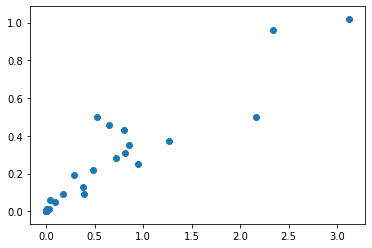

In [21]:
plt.scatter(data['발전량'], data['일사(MJ/m2)'])